In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Project 1

## Loading the data

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv",thousands=' ')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data importing, feature exploration, data cleaning

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

looking at the dimension of the dataset

In [5]:
r,c=list(df.shape)

print('Size of the data set: %d Rows & %d Columns'%(r,c))

Size of the data set: 7043 Rows & 21 Columns


## Data Pre-processing

looking for the column datatypes

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df=df.astype({"SeniorCitizen": object}) #converting the data type of senior citizen as it is not necessary to be in int type

In [8]:
df[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df["TotalCharges"]=df["TotalCharges"].str.strip()  #cleaning the data with spaces

In [10]:
df[df['TotalCharges']==" "] #cleaned data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df.groupby('Churn')['MonthlyCharges'].sum()

Churn
No     316985.75
Yes    139130.85
Name: MonthlyCharges, dtype: float64

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

datatypes  of the columns after they were changed

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.describe() #describing the statistical features of the numerical features

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


listing out the unique values from every non-numerical feature

In [15]:
a=df.columns
for i in a:
    b=len(df[i].unique())
    c=df[i].unique()
    print("There are %d Unique values in the feature '%s' are %s \n"%(b,i,c))

There are 7043 Unique values in the feature 'customerID' are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

There are 2 Unique values in the feature 'gender' are ['Female' 'Male'] 

There are 2 Unique values in the feature 'SeniorCitizen' are [0 1] 

There are 2 Unique values in the feature 'Partner' are ['Yes' 'No'] 

There are 2 Unique values in the feature 'Dependents' are ['No' 'Yes'] 

There are 73 Unique values in the feature 'tenure' are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

There are 2 Unique values in the feature 'PhoneService' are ['No' 'Yes'] 

There are 3 Unique values in the feature 'MultipleLines' are ['No phone service' 'No' 'Yes'] 

There are 3 Unique values in the feature 'InternetService' are ['DSL' 'Fiber optic' 'No'] 

There are 3 Unique valu

In [16]:
#listing out every numerical feature
a=len(df.select_dtypes(np.number).columns)
b=df.select_dtypes(np.number).columns
print("There are %d Numerical Features and they are %s \n"%(a,b))

There are 3 Numerical Features and they are Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') 



In [17]:
#listing out every n0n-numerical feature
a=len(df.select_dtypes(exclude=np.number).columns)
b=df.select_dtypes(exclude=np.number).columns
print("There are %d Non-Numerical Features and they are %s \n"%(a,b))

There are 18 Non-Numerical Features and they are Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object') 



#### Check for null/missing values and imputed with relevant values

In [18]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df['TotalCharges']=df['TotalCharges'].fillna(0) #replaced the null values with zeros as the tenure for those records itself is zero

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.drop(['customerID'],axis=1,inplace=True) #dropping the customerID column as we didnt see any purpose of it
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploratory Data Analysis

#### Distribution and plots to further analyze our features

In [23]:
#segregating the numerical and non-numerical features
all_ft = set(df.columns)#-set(['Churn'])
num_ft = set(df.describe().columns)
cat_ft = all_ft-num_ft
cat_ft

{'Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'gender'}

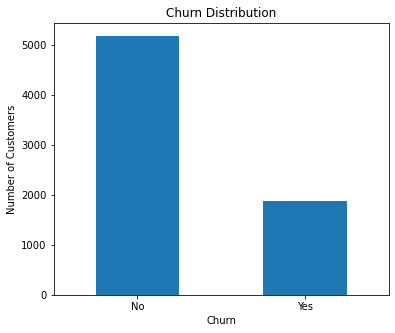

In [24]:
a=df.groupby(['Churn'])['gender'].count()
a.plot(kind='bar',figsize=(6,5))
plt.ylabel('Number of Customers')
plt.title('Churn Distribution')
plt.xticks(rotation = 0)
plt.show()

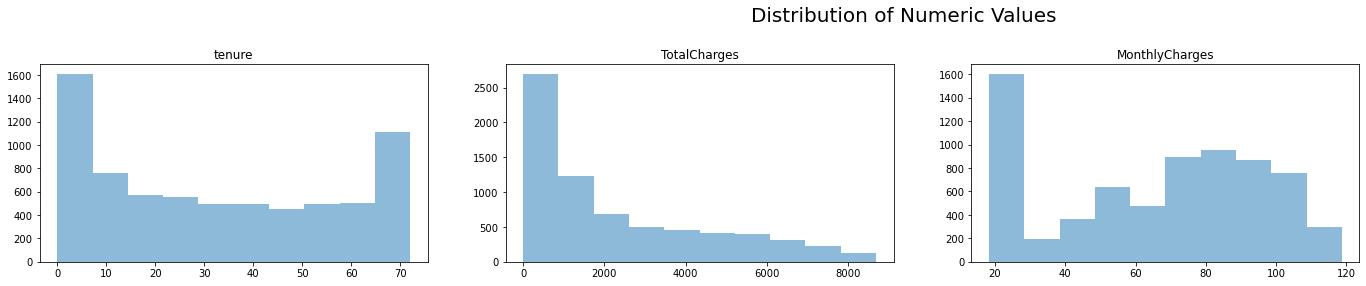

In [25]:
#distribution of numerical features
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(32, 8))
for i in range(len(num_ft)):
    f = list(num_ft)[i]
    plt.subplot(2, 4, i+1)
    hst = plt.hist(df[f], alpha=0.5)
    plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
None

Text(0.5, 0.98, 'Distribution of All Features')

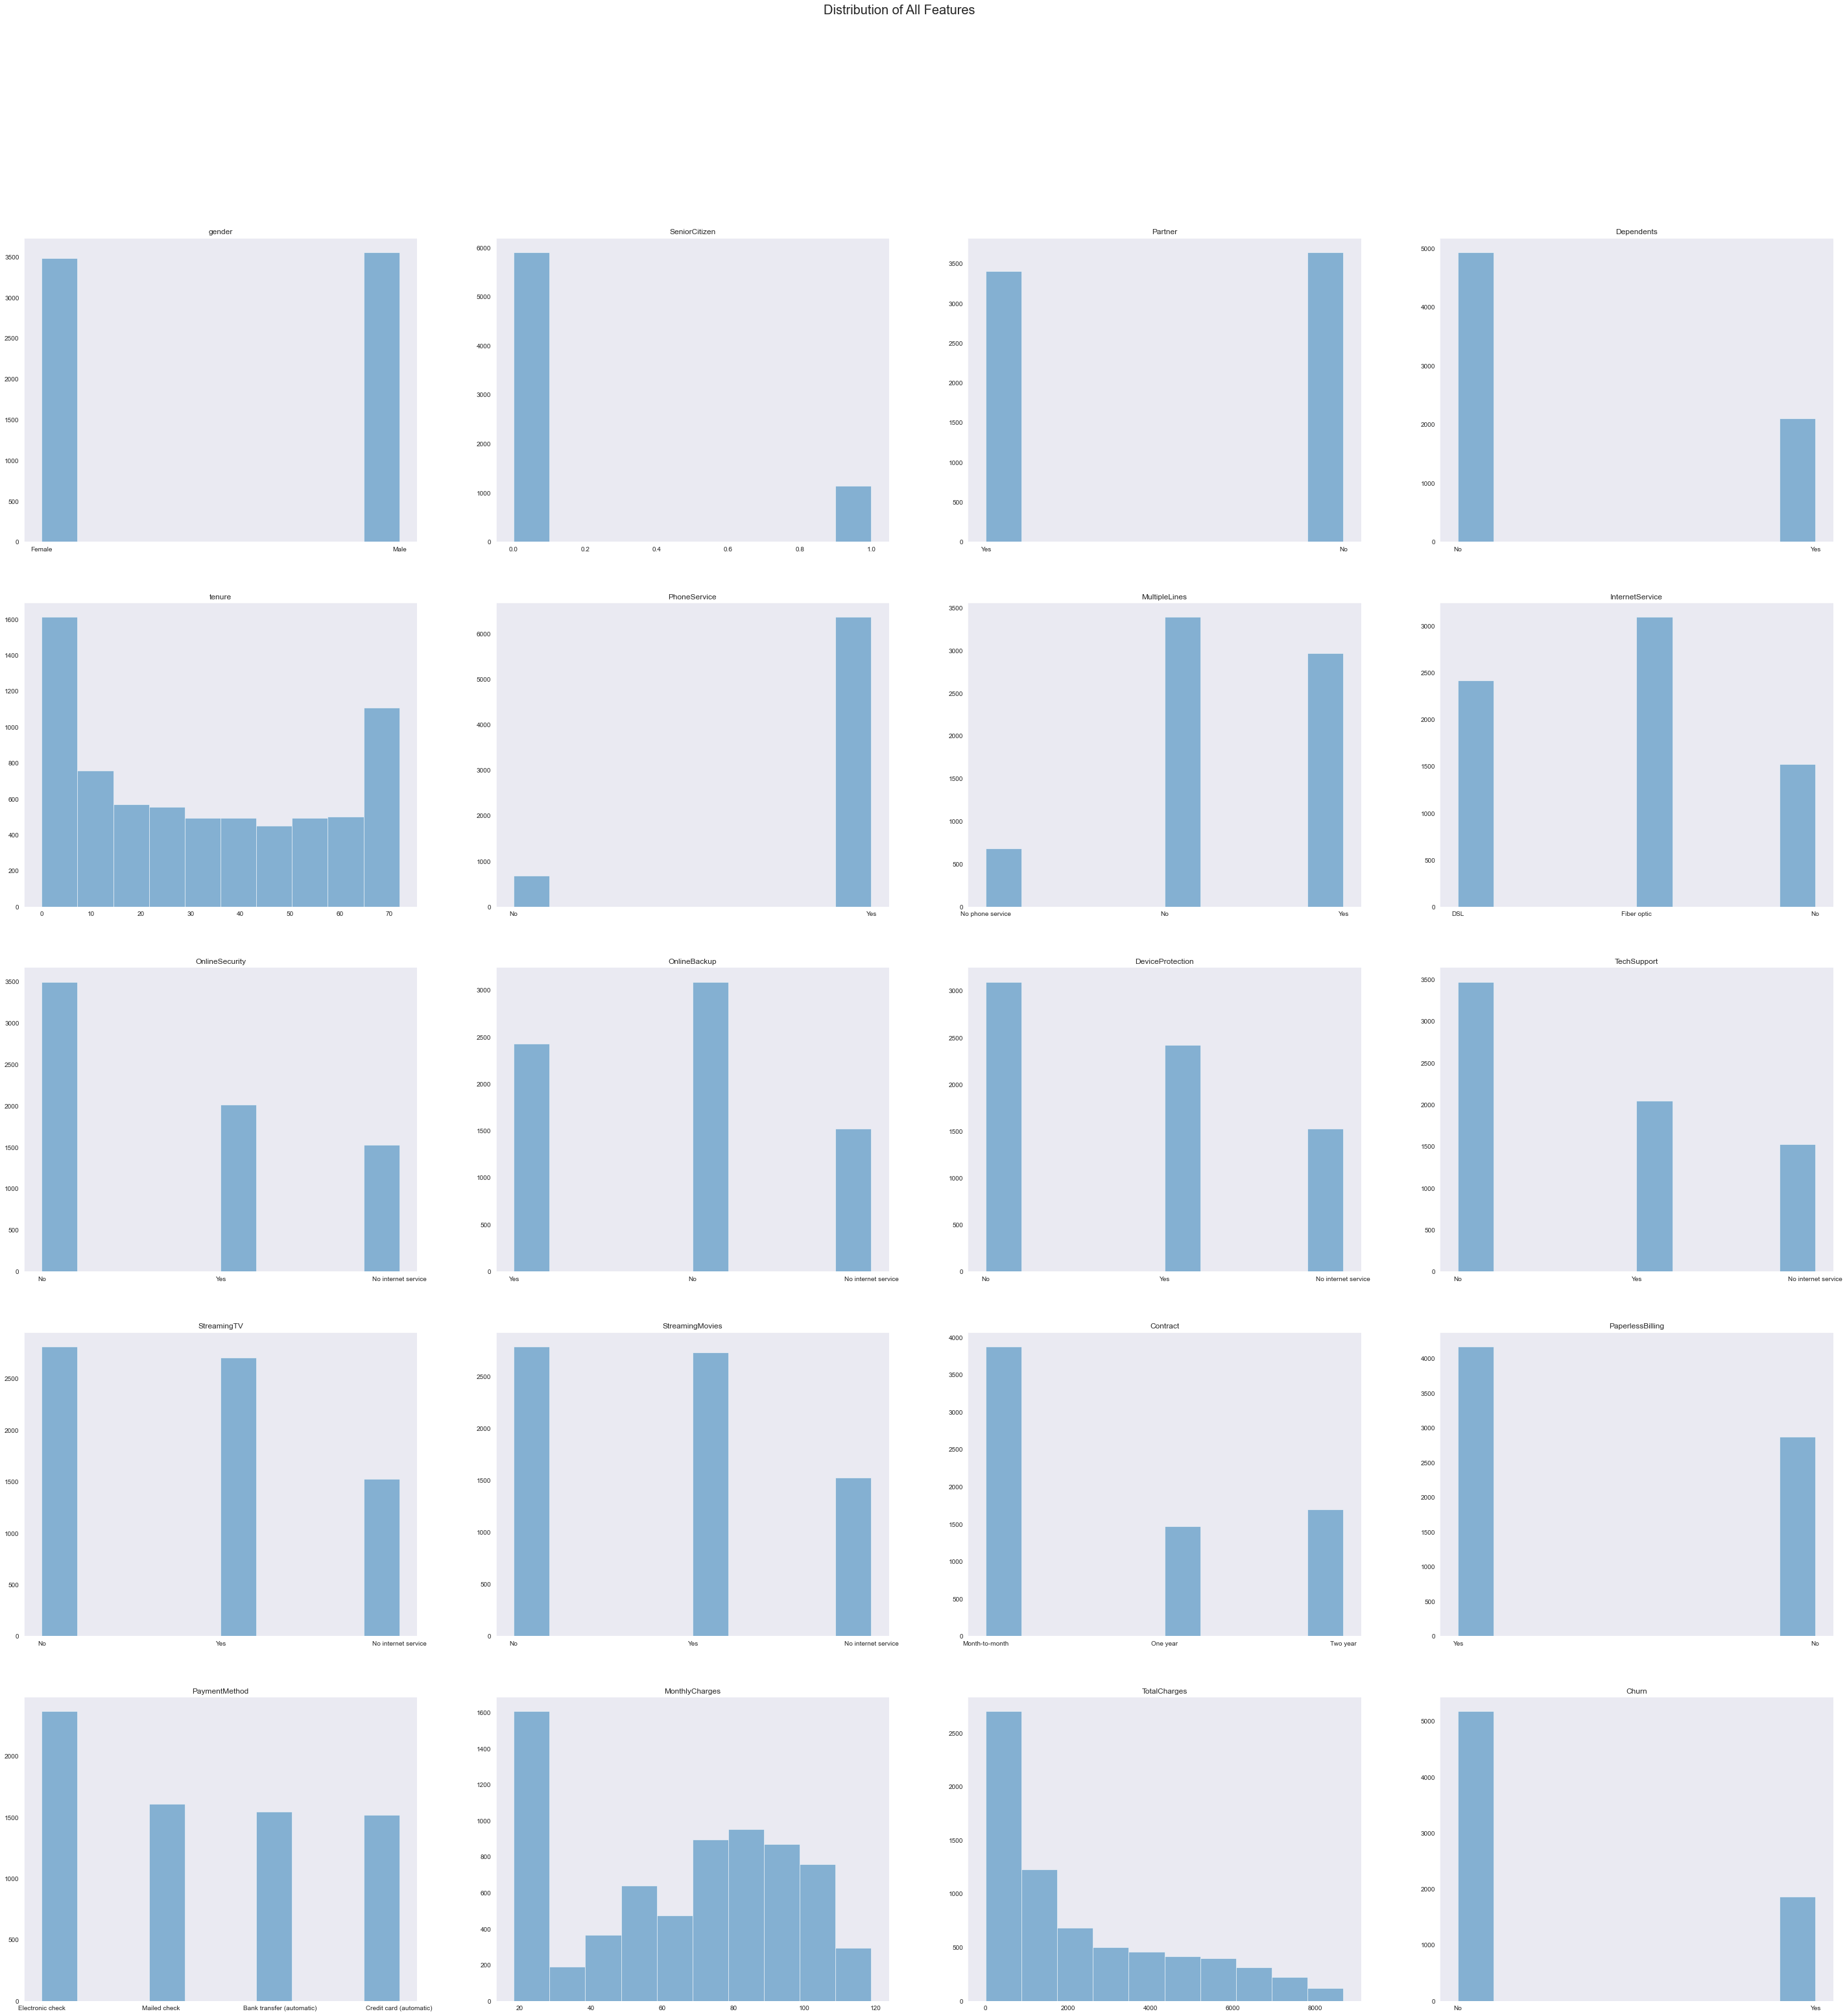

In [26]:
#count plots for our features
sns.set_style("dark")
a=df.loc[ : , df.columns!='customerID']
%matplotlib inline
fig = plt.figure(figsize=(50, 50),facecolor='white')
i=0
for i in range(a.shape[1]):
    plt.subplot(5, 4, i+1)
    hst = plt.hist(a[list(a)[i]], alpha=0.5)
    plt.title(a.columns[i])
plt.suptitle('Distribution of All Features', fontsize=20)

Text(0.5, 1.0, 'Payment Method Distribution')

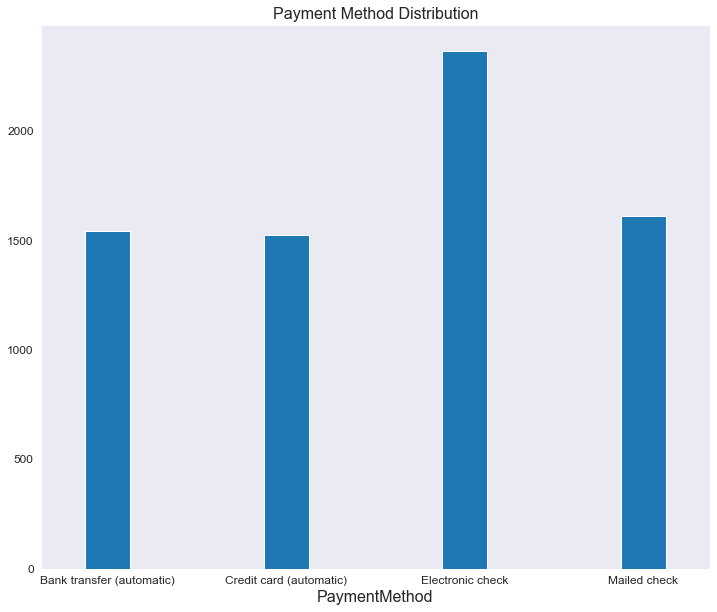

In [27]:
#a study on the payment method adopted by the customers
a=df.groupby(['PaymentMethod'])["tenure"].count()
#a=a.sort_values(axis=1)
a.plot(kind='bar',figsize=(12,10),width=0.25)
plt.xticks(rotation = 0, size=12)
plt.yticks(size=12)
plt.xlabel('PaymentMethod',size=16)
plt.title('Payment Method Distribution',size=16)

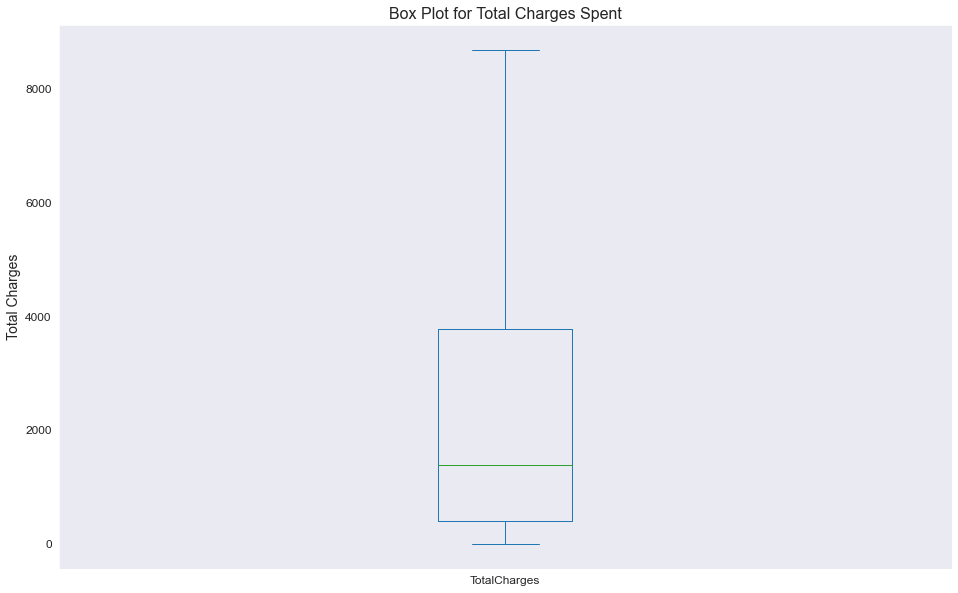

In [28]:
#box plot of the total charges
a=df['TotalCharges']
a.plot(kind='box', figsize=(16,10))
plt.title('Box Plot for Total Charges Spent',size=16)
plt.ylabel('Total Charges',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [29]:
plots = {1 : [111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224], 5:[231,232,233,234,235],6:[231,232,233,234,235,236]}
#defining a fn to plot counts against our targetted category
def countplot(x, y, df):
    
  r = int(str(plots[len(y)][0])[0])
  c = int(str(plots[len(y)][0])[1])
  plt.figure(figsize = (7*c, 7*r))
  for i, j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.countplot( x = j, hue = x, data = df)
    ax.set_title(j)
    
  return plt.show()

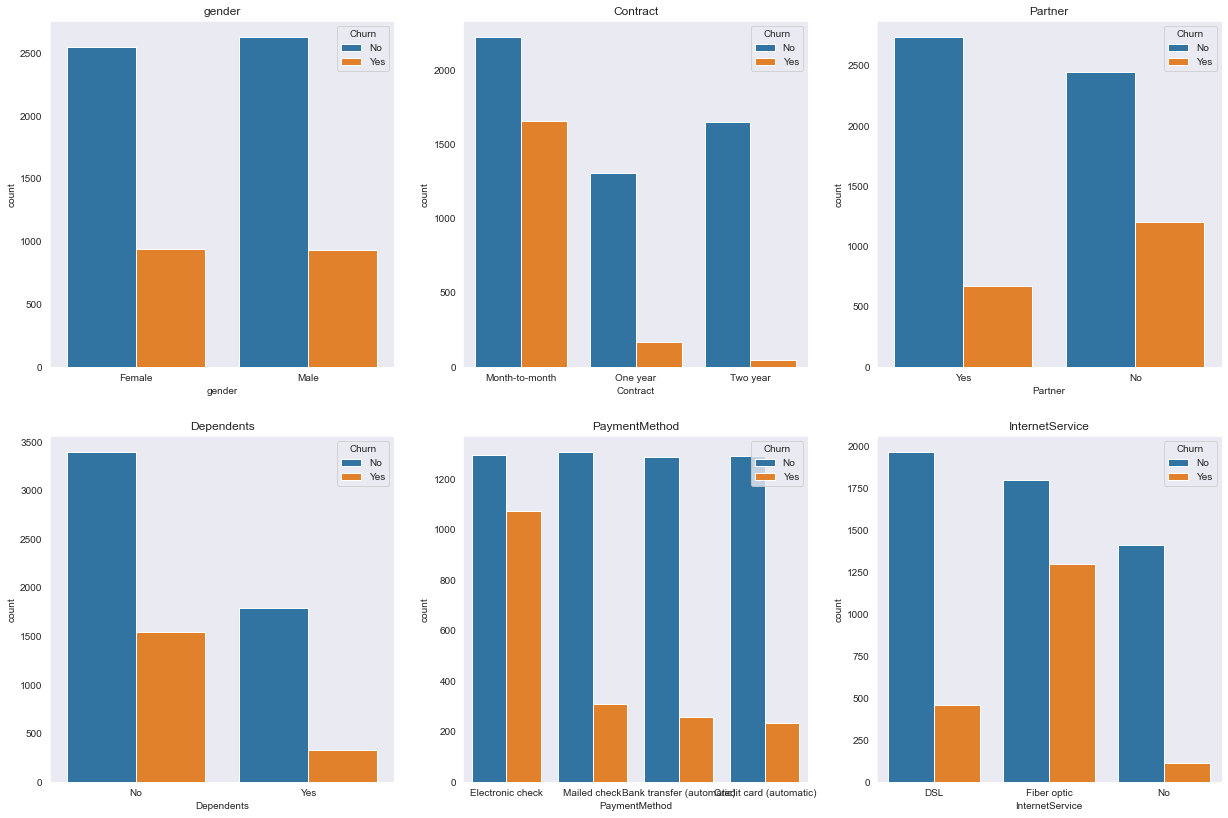

In [30]:
countplot("Churn",['gender','Contract','Partner','Dependents','PaymentMethod','InternetService'], df)

In [31]:
techSup = df[['TechSupport','Churn']]
techSup.loc[(techSup['TechSupport'] == 'No internet service')] = 'No'

C:\Users\Swathy R\AppData\Local\Temp\ipykernel_4412\125098358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  techSup.loc[(techSup['TechSupport'] == 'No internet service')] = 'No'


In [32]:
plots = {1 : [111]}
#defining a fn to plot counts against our targetted category
def countplot(x, y, df):
    
  r = int(str(plots[len(y)][0])[0])
  c = int(str(plots[len(y)][0])[1])
  plt.figure(figsize = (7*c, 7*r))
  for i, j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.countplot( x = j, hue = x, data = df)
    ax.set_title(j)
    
  return plt.show()

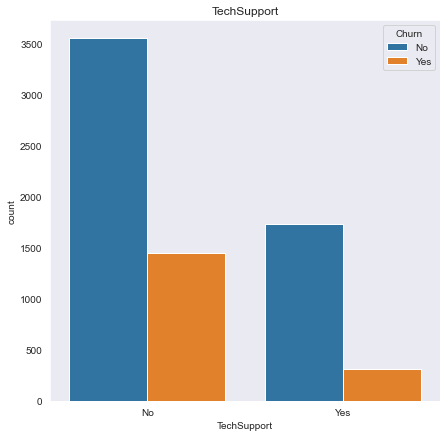

In [33]:
countplot("Churn",['TechSupport'], techSup)

In [34]:
#summary of the values from our features
for f in cat_ft:
    tab = df[f].value_counts()
    print('%s:\t%s' % (f, ', '.join([ ("%s(%d)" %(tab.index[i], tab.values[i])) for i in range(len(tab))]) ))

MultipleLines:	No(3390), Yes(2971), No phone service(682)
Churn:	No(5174), Yes(1869)
PhoneService:	Yes(6361), No(682)
gender:	Male(3555), Female(3488)
InternetService:	Fiber optic(3096), DSL(2421), No(1526)
StreamingTV:	No(2810), Yes(2707), No internet service(1526)
Dependents:	No(4933), Yes(2110)
OnlineSecurity:	No(3498), Yes(2019), No internet service(1526)
DeviceProtection:	No(3095), Yes(2422), No internet service(1526)
SeniorCitizen:	0(5901), 1(1142)
StreamingMovies:	No(2785), Yes(2732), No internet service(1526)
Contract:	Month-to-month(3875), Two year(1695), One year(1473)
OnlineBackup:	No(3088), Yes(2429), No internet service(1526)
PaperlessBilling:	Yes(4171), No(2872)
PaymentMethod:	Electronic check(2365), Mailed check(1612), Bank transfer (automatic)(1544), Credit card (automatic)(1522)
TechSupport:	No(3473), Yes(2044), No internet service(1526)
Partner:	No(3641), Yes(3402)


In [35]:
 [ df[f].value_counts() for f in list(cat_ft) ]

[No                  3390
 Yes                 2971
 No phone service     682
 Name: MultipleLines, dtype: int64,
 No     5174
 Yes    1869
 Name: Churn, dtype: int64,
 Yes    6361
 No      682
 Name: PhoneService, dtype: int64,
 Male      3555
 Female    3488
 Name: gender, dtype: int64,
 Fiber optic    3096
 DSL            2421
 No             1526
 Name: InternetService, dtype: int64,
 No                     2810
 Yes                    2707
 No internet service    1526
 Name: StreamingTV, dtype: int64,
 No     4933
 Yes    2110
 Name: Dependents, dtype: int64,
 No                     3498
 Yes                    2019
 No internet service    1526
 Name: OnlineSecurity, dtype: int64,
 No                     3095
 Yes                    2422
 No internet service    1526
 Name: DeviceProtection, dtype: int64,
 0    5901
 1    1142
 Name: SeniorCitizen, dtype: int64,
 No                     2785
 Yes                    2732
 No internet service    1526
 Name: StreamingMovies, dtype: int

In [36]:
#summary of the values from our features in df format
mat = pd.DataFrame(
    [ df[f].value_counts() for f in list(cat_ft) ],
    index=list(cat_ft)
    ).stack()

pd.DataFrame(mat.values, index=mat.index)

0
MultipleLines    No                         3390.0
                 Yes                        2971.0
                 No phone service            682.0
Churn            No                         5174.0
                 Yes                        1869.0
PhoneService     No                          682.0
                 Yes                        6361.0
gender           Male                       3555.0
                 Female                     3488.0
InternetService  No                         1526.0
                 Fiber optic                3096.0
                 DSL                        2421.0
StreamingTV      No                         2810.0
                 Yes                        2707.0
                 No internet service        1526.0
Dependents       No                         4933.0
                 Yes                        2110.0
OnlineSecurity   No                         3498.0
                 Yes                        2019.0
                 No internet service        1526.0
DeviceProtection No                         3095.0
                 Yes                        2422.0
                 No internet service        1526.0
SeniorCitizen    0                          5901.0
                 1                          1142.0
StreamingMovies  No                         2785.0
                 Yes                        2732.0
                 No internet service        1526.0
Contract         Month-to-month             3875.0
                 Two year                   1695.0
                 One year                   1473.0
OnlineBackup     No                         3088.0
                 Yes                        2429.0
                 No internet service        1526.0
PaperlessBilling No                         2872.0
                 Yes                        4171.0
PaymentMethod    Electronic check           2365.0
                 Mailed check               1612.0
                 Bank transfer (automatic)  1544.0
                 Credit card (automatic)    1522.0
TechSupport      No                         3473.0
                 Yes                        2044.0
                 No internet service        1526.0
Partner          No                         3641.0
                 Yes                        3402.0

In [37]:
x=df.drop(columns=['Churn'])
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


## Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
#label encoding the binary featured columns

class_le = LabelEncoder()
y = class_le.fit_transform(df['Churn'].values) # target variable
gender = class_le.fit_transform(df['gender'].values)
partner = class_le.fit_transform(df['Partner'].values)
dependents = class_le.fit_transform(df['Dependents'].values)
phoneService = class_le.fit_transform(df['PhoneService'].values)
paperlessBilling = class_le.fit_transform(df['PaperlessBilling'].values)
SeniorCitizen=df['SeniorCitizen']

In [39]:
#creating a table for such encoded values
dicts={'gender':gender,'Partner':partner,'Dependents':dependents,'PhoneService':phoneService,'PaperlessBilling':paperlessBilling,'SeniorCitizen':SeniorCitizen}
Y=pd.DataFrame(
    dicts)
Y

,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,0
3,1,0,0,0,0,0
4,0,0,0,1,1,0
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


In [40]:
#onehotencoding using pandas get dummies fn.
A=pd.get_dummies(df[["tenure","MonthlyCharges","TotalCharges","InternetService","OnlineSecurity","OnlineBackup","StreamingMovies","StreamingTV","PaymentMethod","Contract",
       "DeviceProtection","TechSupport","MultipleLines"]])
A

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,Contract_Two year,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,1,29.85,29.85,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,2,53.85,108.15,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
4,2,70.70,151.65,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
7040,11,29.60,346.45,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [41]:
#final table after label encoding
final_df = pd.concat([Y,A],axis=1,join="inner")
final_df

,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,...,Contract_Two year,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,0,1,0,1,29.85,29.85,1,...,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,34,56.95,1889.50,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,1,1,0,2,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,45,42.30,1840.75,1,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,1,1,0,2,70.70,151.65,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,24,84.80,1990.50,1,...,0,0,0,1,0,0,1,0,0,1
7039,0,1,1,1,1,0,72,103.20,7362.90,0,...,0,0,0,1,1,0,0,0,0,1
7040,0,1,1,0,1,0,11,29.60,346.45,1,...,0,1,0,0,1,0,0,0,1,0
7041,1,1,0,1,1,1,4,74.40,306.60,0,...,0,1,0,0,1,0,0,0,0,1


## Scaling using min-max scaler

In [42]:
x=final_df

In [44]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xmms = mms.fit_transform(x)
xmms

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

### Checking if data is balanced or not

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  #optional, for ggplot-like style

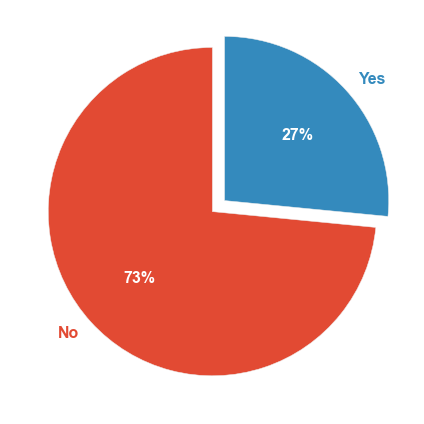

In [48]:
pie_data = df['Churn'].value_counts(normalize=True).values * 100
pie_label = df['Churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

# 27% of Customers leaving the plan, therefore, it is an imbalanced data.

#### The dataset is highly imbalanced

## Balancing the dataset using SMOTE technique

In [49]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#from sklearn.metrics import DistanceMetric as _DistanceMetric
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)

# transform the dataset
oversample = SMOTE(sampling_strategy='minority',random_state=42)
x_or, y_or = oversample.fit_resample(xmms, y)

# summarize the new class distribution
counter2 = Counter(y_or)
print(counter2)
print(x_or.shape)

Counter({0: 5174, 1: 5174})
(10348, 40)


In [50]:
# Convert x_or and y_or to pandas DataFrames
x_or_df = pd.DataFrame(x_or, columns=x.columns)
y_or_df = pd.DataFrame(y_or, columns=['Churn'])

# Concatenate the input and target DataFrames
df_or = pd.concat([x_or_df, y_or_df],axis=1)

## Splitting the dataset into test and train data

In [51]:
#splitting min max scaled data to train and test for model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_or_df,y_or_df,stratify = y_or_df,test_size=0.3,random_state=42)

# Model Training

### Logistic Regression

In [53]:
#training the model with min max scaled data
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model = model.fit(x_train,y_train)

C:\Users\Swathy R\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print(model.get_params)

<bound method BaseEstimator.get_params of LogisticRegression()>


In [55]:
#testing the model with min max scaled data and calculation the accuracy score
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

score =accuracy_score(y_test,y_pred)

In [56]:
print("Accuracy of the Logistic Model is :: %f"%(score*100))

Accuracy of the Logistic Model is :: 78.615137


In [57]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1553
           1       0.76      0.84      0.80      1552

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



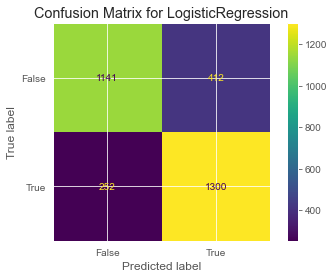

In [58]:
#confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for LogisticRegression")
plt.show()

### SVM

In [60]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 42)
classifier_svm.fit(x_train, y_train)

C:\Users\Swathy R\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [61]:
y_pred = classifier_svm.predict(x_test)

In [62]:
acc_svm = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM is :: %f"%(acc_svm*100))

Accuracy of the SVM is :: 74.750403


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1553
           1       0.70      0.85      0.77      1552

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.74      3105
weighted avg       0.76      0.75      0.74      3105



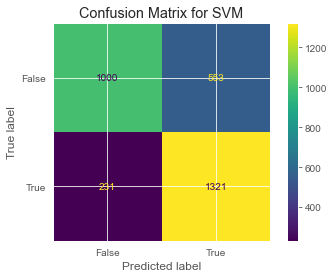

In [64]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for SVM")
plt.show()

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [66]:
y_pred = classifier_dt.predict(x_test)

In [67]:
acc_decisiontree = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree is :: %f"%(acc_decisiontree*100))

Accuracy of the Decision Tree is :: 78.228663


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1553
           1       0.78      0.78      0.78      1552

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



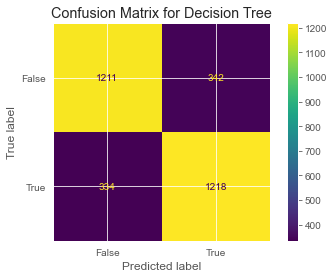

In [69]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(x_train, y_train)

C:\Users\Swathy R\AppData\Local\Temp\ipykernel_4412\3690528432.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [71]:
y_pred = classifier_rf.predict(x_test)

In [72]:
acc_randomForest = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest is :: %f"%(acc_randomForest*100))

Accuracy of the Random Forest is :: 83.317230


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1553
           1       0.84      0.82      0.83      1552

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



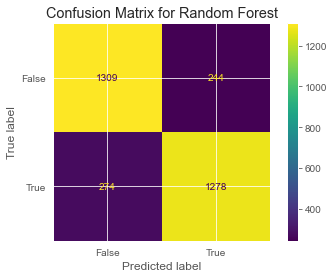

In [74]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for Random Forest")
plt.show()

### XGBoost

In [75]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [76]:
y_pred = classifier_xgb.predict(x_test)

In [77]:
acc_xgb = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost is :: %f"%(acc_xgb*100))

Accuracy of the XGBoost is :: 84.476651


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1553
           1       0.84      0.86      0.85      1552

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



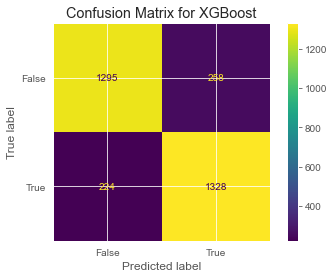

In [79]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for XGBoost")
plt.show()

In [80]:
# get the feature importance scores
importance = classifier_xgb.feature_importances_

# create a dataframe of feature importance scores
feat_imp = pd.DataFrame({'feature': x_train.columns, 'importance': importance})

# sort the dataframe by feature importance score in descending order
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# print the feature importance scores
print(feat_imp)

                                    feature  importance
28                  Contract_Month-to-month    0.426322
10              InternetService_Fiber optic    0.075695
12                        OnlineSecurity_No    0.050860
20                      StreamingMovies_Yes    0.043743
34                           TechSupport_No    0.036542
26           PaymentMethod_Electronic check    0.025021
4                          PaperlessBilling    0.022474
9                       InternetService_DSL    0.022379
5                             SeniorCitizen    0.022059
29                        Contract_One year    0.019633
1                                   Partner    0.019294
0                                    gender    0.019121
2                                Dependents    0.017540
30                        Contract_Two year    0.016953
15                          OnlineBackup_No    0.015994
18                       StreamingMovies_No    0.015177
21                           StreamingTV_No    0

### K-Nearest Neighbours

Text(0, 0.5, 'Accuracy Score')

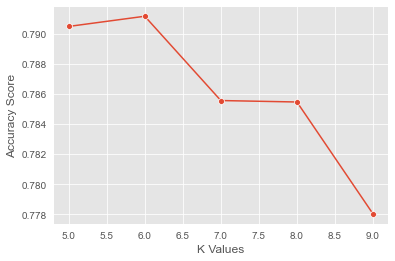

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
k_values = [i for i in range (5,10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x_or_df,y_or_df, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")    

In [84]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k

6

In [89]:
# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_train,y_train)
y_pred_k=knn.predict(x_test)

score =accuracy_score(y_test,y_pred_k)
print("Accuracy of the KNN model is :: %f"%(score*100))
print(classification_report(y_test,y_pred_k))



Accuracy of the KNN model is :: 78.743961
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1553
           1       0.75      0.86      0.80      1552

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



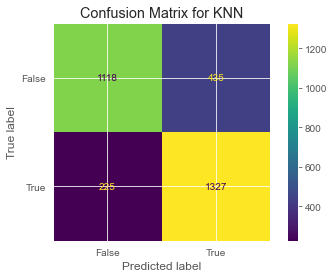

In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_k)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True] )
cm_display.plot(ax=None)
plt.title("Confusion Matrix for KNN")
plt.show()

## Cross-validation of all models

In [91]:
classifiers = []
classifiers.append(classifier_dt)
classifiers.append(classifier_rf)
classifiers.append(model)
classifiers.append(classifier_svm)
classifiers.append(classifier_xgb)
classifiers.append(knn)


len(classifiers)

6

In [92]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

In [93]:
cv_mean=[]
cv_std=[]
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res=pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std':cv_std,
                   'Algorithm':['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'XGBoost','KNN']})
cv_res.sort_values(by='Cross Validation Mean', ascending=False)

,Cross Validation Mean,Cross Validation Std,Algorithm
4,0.845783,0.008245,XGBoost
1,0.831289,0.011790,Random Forest
5,0.784341,0.011806,KNN
0,0.781583,0.014214,Decision Tree
2,0.776609,0.015102,Logistic Regression
3,0.752448,0.017015,SVM


Text(0.5, 1.0, 'Cross Validation Scores')

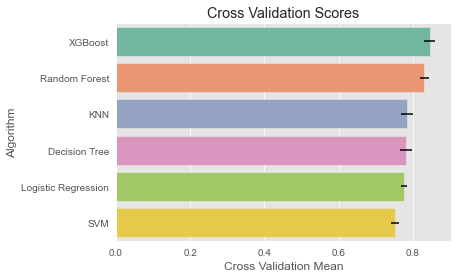

In [94]:
sns.barplot(x='Cross Validation Mean', y='Algorithm', data=cv_res, order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'], palette='Set2', **{'xerr':cv_std})
plt.title("Cross Validation Scores")

## Comparing the ROC Curves

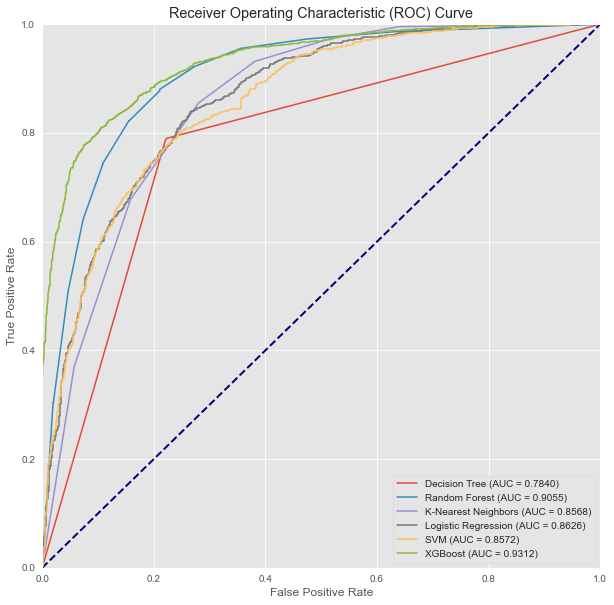

In [97]:
from sklearn.metrics import roc_curve, auc
classifiers = {
    'Decision Tree': classifier_dt,
    'Random Forest': classifier_rf,
    'K-Nearest Neighbors': knn,
    'Logistic Regression': model,
    'SVM': classifier_svm,
    'XGBoost' : classifier_xgb
}

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for name, classifier in classifiers.items():
    try:
        y_score = classifier.predict_proba(x_test)[:,1]
    except AttributeError:
        # Some classifiers like SVM do not have predict_proba() available, so we fall back to decision_function()
        y_score = classifier.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()